<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [287]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib.cbook import boxplot_stats

In [288]:
#исходные данные задачи 
##### PART 1
n=5000
mu, sigma = 0,1 
# mean and standard deviation

In [289]:
s = np.random.normal(mu, sigma, n)
a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
print(a_estimate,sigma_estimate,"\n")
print(s)

-0.009945295891919574 1.0092286375666795 

[ 2.22058526 -0.48332348 -0.60876184 ...  1.10749357  0.27056008
 -0.9707262 ]


Axes(0.125,0.11;0.775x0.77)


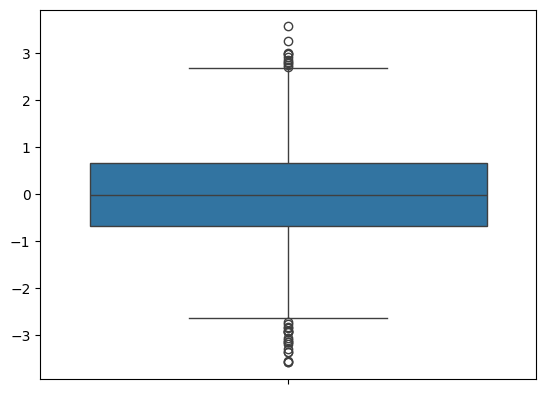

In [290]:
#### вывод ящика с усами
import seaborn as sb
W=sb.boxplot(s)
print(W)

In [291]:
k_bins = 15
count, bin_edges = np.histogram(s,k_bins)
### count содержит абсолютные частоты для каждого интервала
print(count)
print(bin_edges)
sum(count)

[ 10  11  50 169 358 601 830 944 837 592 351 166  64  15   2]
[-3.59318621 -3.11512859 -2.63707096 -2.15901334 -1.68095571 -1.20289809
 -0.72484046 -0.24678284  0.23127479  0.70933241  1.18739004  1.66544766
  2.14350529  2.62156291  3.09962054  3.57767817]


np.int64(5000)

2.091798032293659
1.0000000000000004


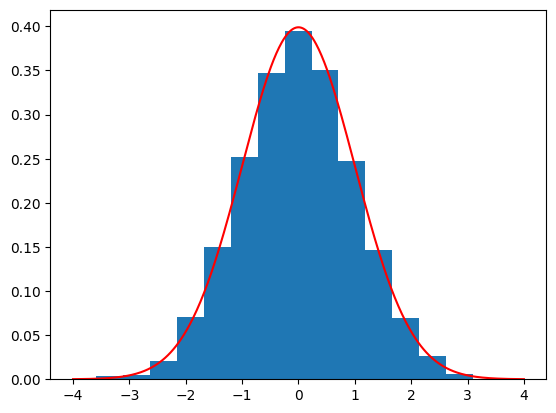

In [292]:
k_bins= 15
count, bins, ignored  = plt.hist(s, k_bins, density=True)
### гистограмма частот: сумма высот прямоугольников равна объему выборки
print(sum(count))
print(sum(count*(bin_edges[1]-bin_edges[0])))

x = np.linspace(-4,4,500)
pdf = sci.stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")



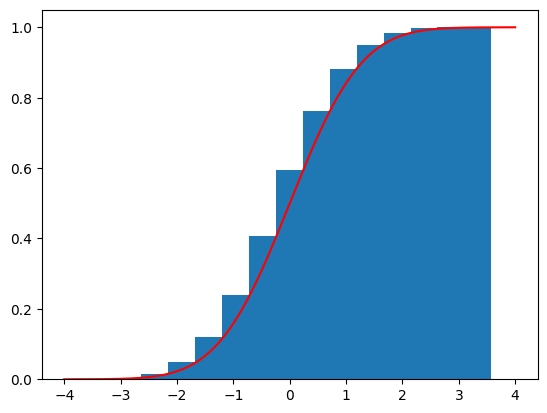

In [293]:
k_bins= 15
count, bins, ignored  = plt.hist(s, k_bins, density=True, cumulative=True)

x = np.linspace(-4,4,500)
cdf = sci.stats.norm.cdf(x, mu,sigma)
plt.plot(x, cdf, color ="r")

Axes(0.125,0.11;0.775x0.77)
[-3.37481421 -3.12069558 -3.58443745 -3.20788249 -2.84290375 -2.72634708
 -2.77929685 -3.15095538 -2.94319396 -2.93628753 -3.36870199 -2.92991948
 -2.86796769 -3.57250118 -2.92753099 -3.15580151 -3.31067025 -3.59318621
 -3.08072121  2.9988679   3.57767817  2.92899536  3.26539299  2.98442696
  2.81371735  2.71833553  2.98238996  2.80324365  2.74622059  2.86631737]
Выбросы: [ 2.9988679   3.57767817 -3.37481421  2.92899536 -3.12069558  3.26539299
 -3.58443745 -3.20788249  2.98442696 -2.84290375 -2.72634708 -2.77929685
 -3.15095538 -2.94319396 -2.93628753  2.81371735 -3.36870199 -2.92991948
 -2.86796769  2.71833553 -3.57250118 -2.92753099  2.98238996  2.80324365
 -3.15580151  2.74622059  2.86631737 -3.31067025 -3.59318621 -3.08072121]


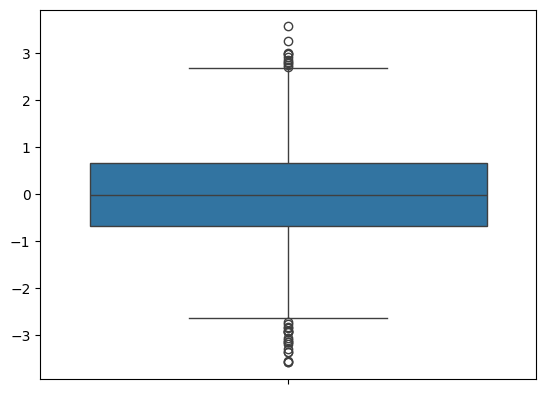

In [311]:
W=sb.boxplot(s)
print(W)          
out = boxplot_stats(s)
out=out[0]
print(out['fliers'])

q1 = np.percentile(s, 25)
q3 = np.percentile(s, 75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Выбор выбросов
outliers = s[(s < lower_bound) | (s > upper_bound)]
print("Выбросы:", outliers)

        
